<h2>Count reads</h2>

In [1]:
with open('./SRR8185316.fastq', 'r') as f:
    temp = f.readlines()
count = len(temp) // 4
print(f"This FASTQ file has {count} reads")

This FASTQ file has 2297280 reads


<h2>First read</h2>

In [2]:
first_read = []
with open('./SRR8185316.fastq', 'r') as f:
    for i in range(4):
        first_read.append(f.readline())
print(f"First read:\n\nIdentifier: {first_read[0]}\nSequence: {first_read[1]}\nQuality: {first_read[-1]}")

First read:

Identifier: @SRR8185316.1 ERR022075.10741970 length=100

Sequence: AGCGGTACACATTATGGGTCTGCTCTCCGCAGGCGGCGTACACAGCCACGAAGATCACATCATGGCGATGGTAGAACTGGCAGCTGAACGCGGCGCAGAA

Quality: IIGIIIIIIIIIIIIHIIIIIIIIIIIIIIIII@IHHEHIIIIIIIIIIIHIIHIIIIIIIIGIHIIHFIIEIIGIHHGH@BE3BB>@>>2?@8?>?A@1



<h2>Find desired sub-sequence</h2>

In [3]:
sub_sequence_target = 'TTAAATGGAA'
count = 0
for i in range(1, len(temp), 4):
    if sub_sequence_target in temp[i]:
        count += temp[i].count(sub_sequence_target)
print(f"Sub-sequence = TTAAATGGAA\nOccurance = {count}")

Sub-sequence = TTAAATGGAA
Occurance = 179


<h2>Copy first 1000 reads into a new file</h2>

In [4]:
reads = temp[:4000]
with open('.\SRR8185316_first4000.fastq', 'w') as f:
    f.writelines(reads)
print("New file created")

New file created


<h2>Boxplot of first 100000 reads</h2>

Text(0.5, 1.0, 'The Results of Quality Scores')

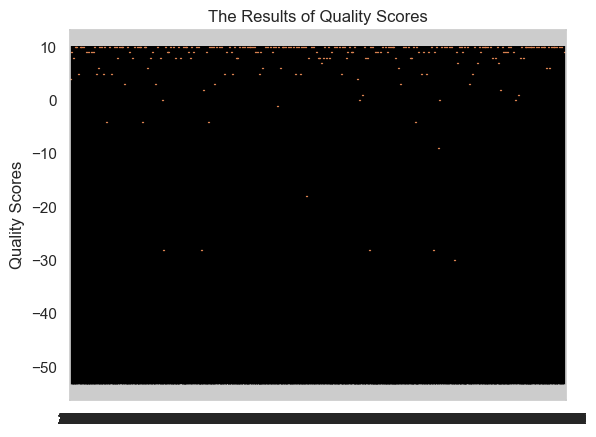

In [15]:
import matplotlib.pyplot as plt
import copy


reads_boxplot = temp[:400000]  # Stores first 100000 reads
quality_phred_scores = []  # Stores phred quality scores of first 100000 reads here
offset = 63  # To substract from ASCII numbers

# Parse phred scores
for i in range(3, 400000, 4):
    score = [ord(phred) - offset for phred in reads_boxplot[i]]
    quality_phred_scores.append(copy.deepcopy(score))

# Boxplots
fig, ax = plt.subplots()
ax.boxplot(quality_phred_scores, showfliers=False)
ax.set_ylabel("Quality Scores")
ax.set_title("The Results of Quality Scores")

<h2>Boxplot of first 1000 reads</h2>

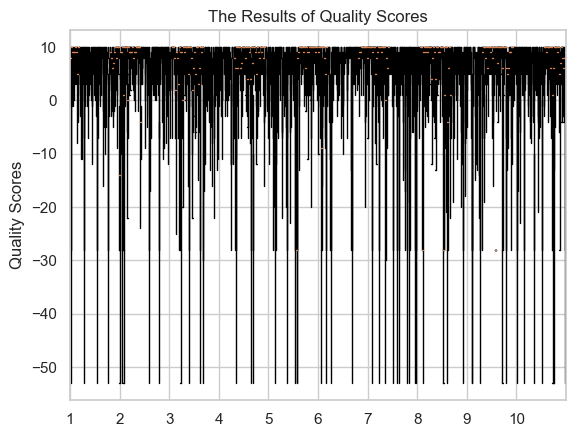

In [23]:
import matplotlib.pyplot as plt
import copy


reads_boxplot = temp[:4000]  # Stores first 100000 reads
quality_phred_scores = []  # Stores phred quality scores of first 100000 reads here
offset = 63  # To substract from ASCII numbers

# Parse phred scores
for i in range(3, 4000, 4):
    score = [ord(phred) - offset for phred in reads_boxplot[i]]
    quality_phred_scores.append(copy.deepcopy(score))

# Boxplots
fig, ax = plt.subplots()
ax.boxplot(quality_phred_scores, showfliers=False)
ax.set_ylabel("Quality Scores")
ax.set_title("The Results of Quality Scores")
plt.xticks([i+1 for i in range(0, 1000, 100)])
plt.show()

<h2>Boxplot of first 100 reads</h2>

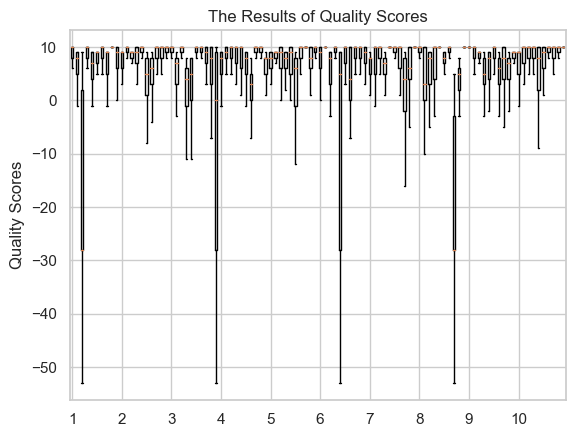

In [20]:
import matplotlib.pyplot as plt
import copy


reads_boxplot = temp[:400]  # Stores first 100000 reads
quality_phred_scores = []  # Stores phred quality scores of first 100000 reads here
offset = 63  # To substract from ASCII numbers

# Parse phred scores
for i in range(3, 400, 4):
    score = [ord(phred) - offset for phred in reads_boxplot[i]]
    quality_phred_scores.append(copy.deepcopy(score))

# Boxplots
fig, ax = plt.subplots()
ax.boxplot(quality_phred_scores, showfliers=False)
ax.set_ylabel("Quality Scores")
ax.set_title("The Results of Quality Scores")
plt.xticks([i+1 for i in range(0, 100, 10)])
plt.show()

<h2>Density Plot of reads' length</h2>

C:\Users\Yazdan\AppData\Local\Temp\ipykernel_5580\1084464779.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True)
C:\Users\Yazdan\AppData\Local\Temp\ipykernel_5580\1084464779.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data, shade=True)


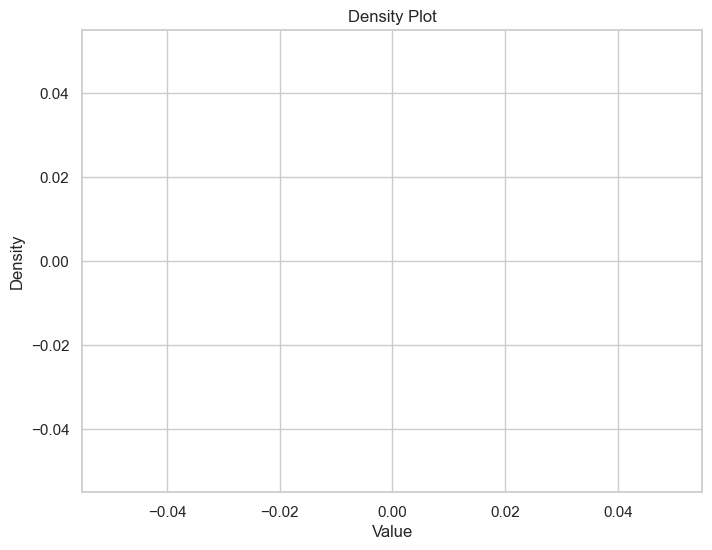

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import copy

# Generating sample data
data = []
for i in range(0, len(temp)-1, 2):
    lenght_index = temp[i].find('length')
    index = lenght_index + 7
    length = temp[i][index:-1]
    data.append(copy.deepcopy(int(length)))

# Create a density plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.kdeplot(data, shade=True)
plt.title('Density Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

<p><b>NOTE:</b> As you can see no diagram ploted by matplotlib casue all the length values were equal to 100</p>

<h2>Histogram of lengths</h2>

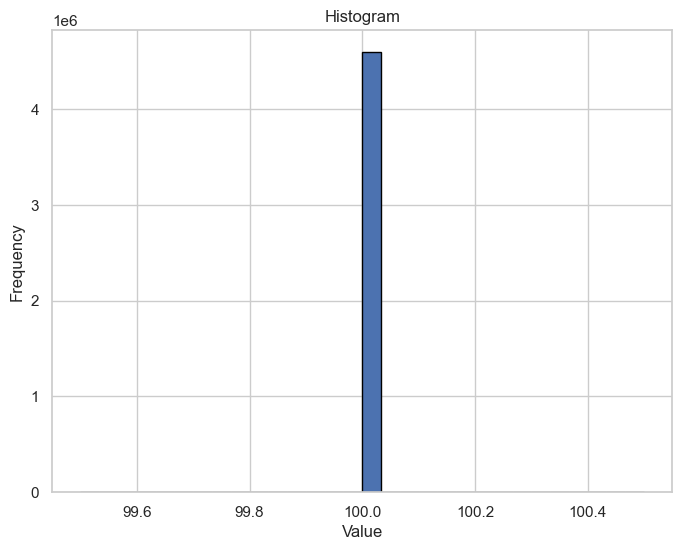

In [24]:
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, edgecolor='black')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

<p><b>NOTE:</b> As you can see in the histogram all the values are equal to 100</p>